In [32]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rc("font", family=["Helvetica", "Arial"]) # skifter skrifttype
plt.rc("axes", labelsize=22)   # skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=22, top=True, direction="out")
plt.rc("ytick", labelsize=22, right=True, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=18)
plt.rcParams["figure.figsize"] = (8, 6)

In [34]:
def flatten_array(arr):
    flattened = []
    for sub in arr[:]:
        flattened = np.concatenate((flattened, sub))
    return flattened
def reject_outliers(data, x, m=5):
    idxs = abs(data - np.mean(data)) < m * np.std(data)
    return data[idxs], x[idxs]
def gaussian(x, amplitude, mean, standard_deviation, b):
    return amplitude * np.exp( - (x - mean)**2 / (2*standard_deviation ** 2)) + b

In [3]:
file = uproot.open("OutDir_1/hist-Rel21sample.root")
tree1 = file['EventTree;1']
tr_vtx_zs = tree1['truthvertex_z'].array(library='np')
tr_vtx_ts = tree1['truthvertex_t'].array(library='np')
re_vtx_zs = tree1['recovertex_z'].array(library='np')

In [11]:
delta_z = np.array([])
for tr_zs, re_zs in zip(tr_vtx_zs, re_vtx_zs):
    xv, yv = np.meshgrid(tr_zs, re_zs)
    delta_z = np.concatenate((delta_z, np.subtract(xv, yv).flatten()))

np.min(delta_z), np.max(delta_z), np.mean(delta_z), np.std(delta_z)

(-285.8702392578125, 285.86163330078125, 0.6453771189819307, 64.04962876539115)

Text(0.5, 0, '$\\Delta z$ (mm)')

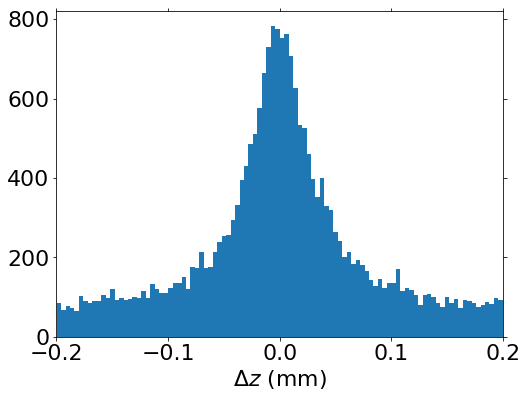

In [16]:
_= plt.hist(delta_z[np.abs(delta_z) < 0.2], 100)
plt.xlim(-0.2, 0.2)
plt.xlabel('$\\Delta z$ (mm)')

In [17]:
## Background test
delta_z_bkg = np.array([])
for i in range(tr_vtx_zs.shape[0]):
    z1 = np.random.normal(scale=45, size=tr_vtx_zs[i].shape[0])
    z2 = np.random.normal(scale=45, size=re_vtx_zs[i].shape[0])
    xv, yv = np.meshgrid(z1, z2)
    delta_z_bkg = np.concatenate((delta_z_bkg, np.subtract(xv, yv).flatten()))

np.min(delta_z_bkg), np.max(delta_z_bkg), np.mean(delta_z_bkg), np.std(delta_z_bkg)

(-335.4874533388969, 344.3727598727801, -0.465659990171498, 63.674092274894065)

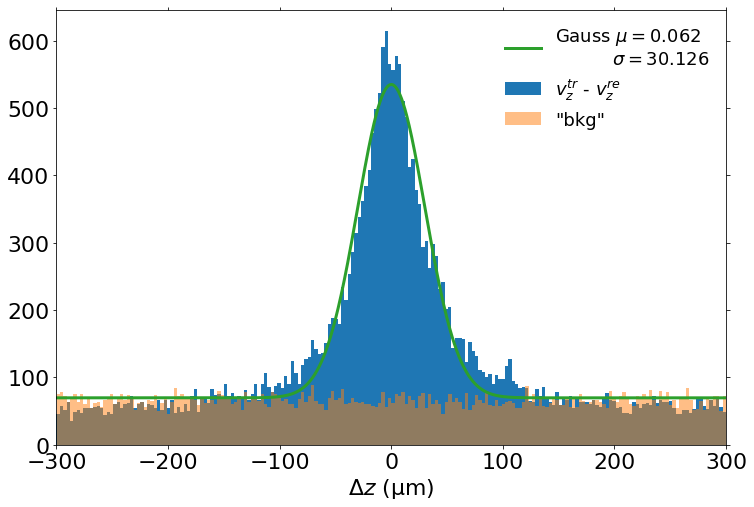

In [56]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 8)

dz_max = 300

bin_heights, bin_borders, _ = ax.hist(1e3*delta_z    [1e3*np.abs(delta_z)     < dz_max],  200, label='$v_z^{tr}$ - $v_z^{re}$')
_                           = ax.hist(1e3*delta_z_bkg[1e3*np.abs(delta_z_bkg) < dz_max],  200, alpha=0.5, label='"bkg"')

bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[400., 0., 1, 10])

#Plot fit
x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
ax.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), lw=3, label='Gauss $\\mu={:.3f}$\n          $\\sigma={:.3f}$'.format(popt[1], popt[2]))

ax.set_xlim(-dz_max, dz_max)
ax.set_xlabel('$\\Delta z$ (µm)')
ax.legend(frameon=False, loc='upper right')

In [57]:
##TODO
# Plot histogram of reconstructed verteces within some delta z for each truth vertex
# Find a link between truth vertex and reco vertex